# How to Use Visualizer Tool


## Pre-work

Import some usefull libraries :

In [1]:
%matplotlib inline
import os
import torch
import numpy as np


Create or load the dataset you want to visualize : 

In [2]:
dict_r = np.load('data_dict.npy', allow_pickle=True).item()
train_db = np.zeros([len(dict_r['env']),2,750])

i = 0
for sample in dict_r['env']:
    train_db[i,:,:] = sample
    i+=1
    
MAX1 = np.max(train_db[:,0,:])
MAX2 = np.max(train_db[:,1,:])
train_db[:,0,:] /= MAX1
train_db[:,1,:] /= MAX2

Create a list of images (list of lists \[loudness array, pitch array])

In [3]:
list_images = [[train_db[i,0,:],train_db[i,1,:]] for i in range(9)]

## Visualizer Tool : 

Import the Visualizer tool and then initialize it : 

In [4]:
from visualizer import Visualizer
V = Visualizer(list_images) 

We can plot the pitch and the loudness of each sample. All printing methods of the visualizer class take a tuple of indexes (a,b) as an optional argument and print the data related to the samples which indexes are included between a and b (included). If the tuple is not provided it is set by default to (0,lenght of images list).

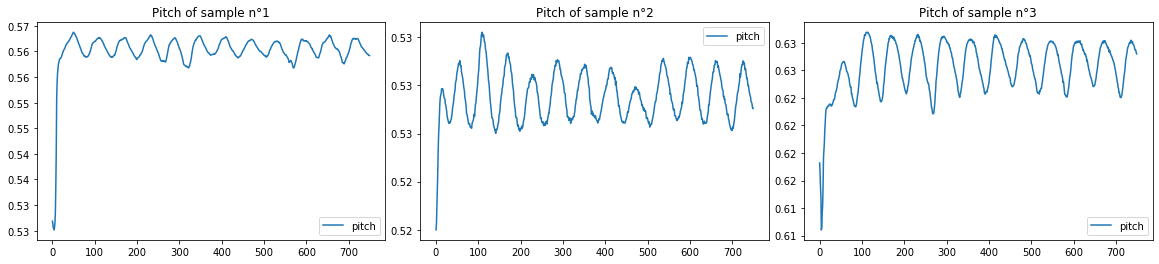

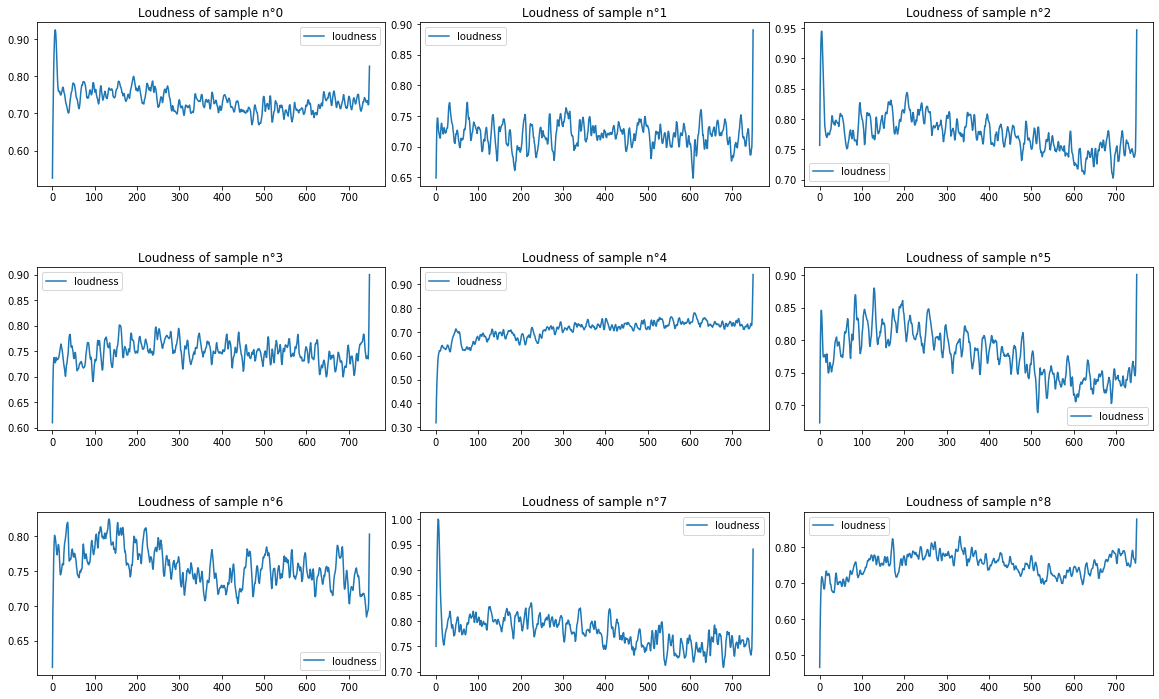

In [5]:
V.show_pitch((1,3))
V.show_loudness()

In order to plot waveforms and spectrograms we need to give the ddsp used as an argument to the *reconstruction* method.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


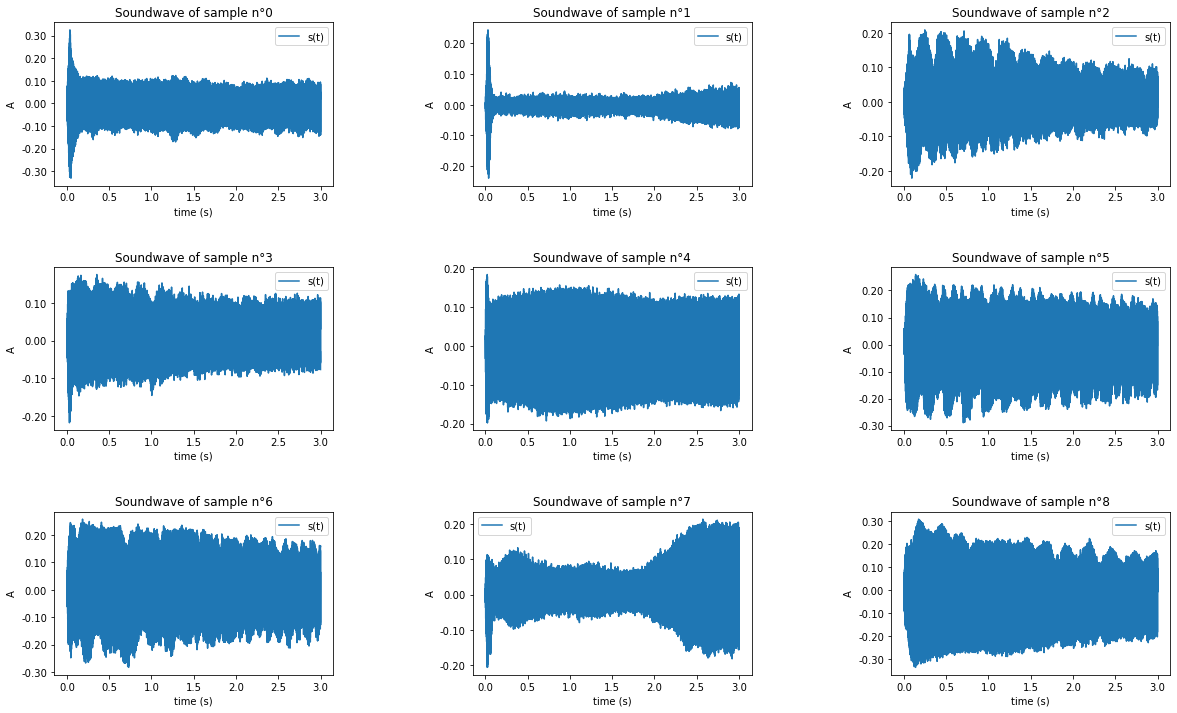

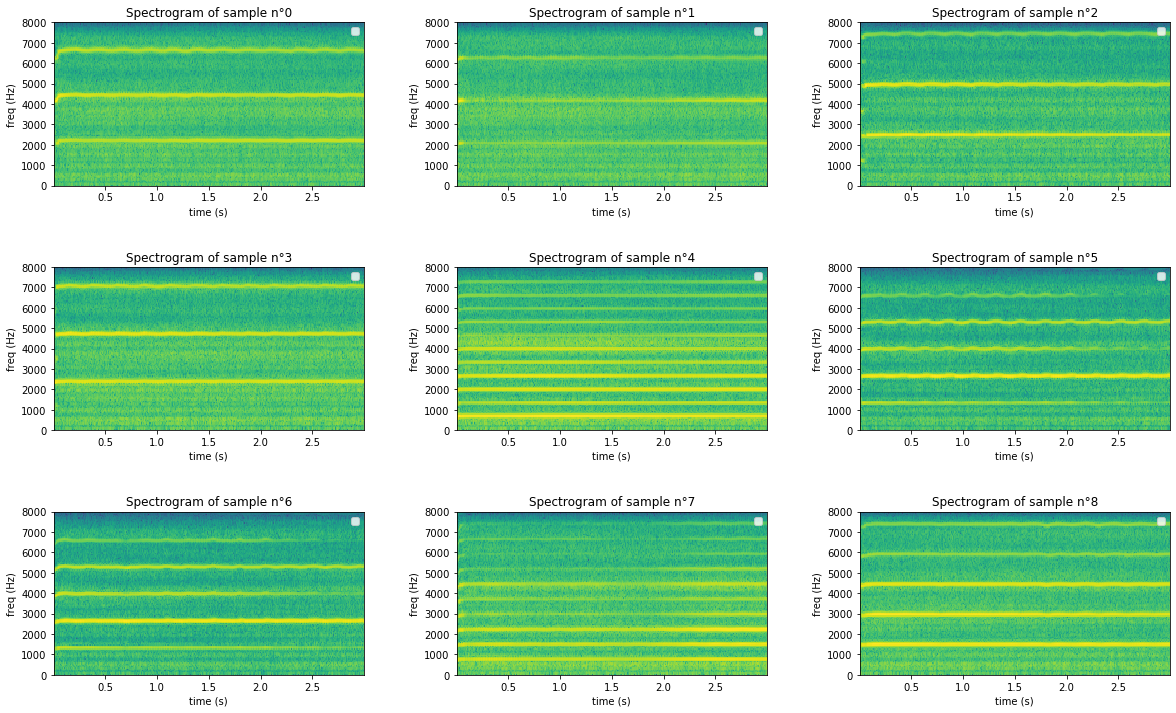

In [6]:
ddsp = torch.jit.load('ddsp_solordinario_pretrained.ts')
V.reconstruction(ddsp,MAX1,MAX2)
V.show_sound()
V.show_spectrogramm()

## Listen to the result : 

The *listen* method only takes the index of the sample as an argument and plays it : 

In [7]:
V.listen(5)